In [1]:
# Pick random values
import random

# Data manipulation
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Interact with database
import sqlite3

In [2]:
""" Generate data values to store in the agents table. """

# Generate names
    # Random first names
agents_first_names: list[str] = ['John', 'Emily', 'Michael', 'Sophia', 'William', 'Emma', 'James', 'Olivia', 'Benjamin', 'Ava', 'Alexander', 'Isabella', 'Daniel', 'Mia', 'Matthew', 'Charlotte', 'David', 'Amelia', 'Joseph', 'Evelyn']


    # Random last names
agents_last_names: list[str] = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor', 'Anderson', 'Thomas', 'Jackson', 'White', 'Harris', 'Martin', 'Thompson', 'Garcia', 'Martinez', 'Robinson']


    # We're going to generate 100 random names
agents_names: list[str] = [(random.choice(agents_first_names)) + " " + (random.choice(agents_last_names)) for _ in range(2000)]


# Generate emails
    # For every name, we're going to take the first letter of their first name, and concatenate it to their last name
agents_emails: list[str] = [(name.split(" ")[0][0] + name.split(" ")[1]).lower() + "@example.com" for name in agents_names]


# Generate attributes
    # Generate AHT values with an average of 7 minutes and a variation of 1 minute
aht = [round(np.random.normal(loc=420, scale=60), 2) for _ in range(2000)]


    # Generate SL rate between 60% and 90%
sl = [round(random.uniform(60, 90), 2) for _ in range(2000)]


    # Generate idle time between 5 minutes and 30 minutes
idle = [abs(round(np.random.normal(loc=300, scale=3000), 2)) for _ in range(2000)]

# Generate supervisor id
supervisor_id: list[str] = [random.randint(1,10) for _ in range(2000)]

In [3]:
""" Generate data values to store in the supervisors table. """

# Generate names
    # List of first names
sup_first_names = ['Emma', 'Liam', 'Olivia', 'Noah', 'Ava', 'William', 'Sophia', 'James', 'Isabella', 'Oliver', 'Charlotte', 'Benjamin', 'Amelia', 'Elijah', 'Mia', 'Lucas', 'Harper', 'Mason', 'Evelyn', 'Logan']

    # List of last names
sup_last_names = ['Brown', 'Johnson', 'Miller', 'Jones', 'Garcia', 'Martinez', 'Davis', 'Rodriguez', 'Martinez', 'Wilson', 'Anderson', 'Taylor', 'Thomas', 'Hernandez', 'Moore', 'Martin', 'Jackson', 'Thompson', 'Perez', 'Gonzalez']


    # Generate 15 random names
supervisors_names: list[str] = [(random.choice(sup_first_names)) + " " + (random.choice(sup_last_names)) for _ in range(15)]

# Generate emails
    # For every name, we're going to take the first letter of their first name, and concatenate it to their last name
supervisors_emails: list[str] = [(name.split(" ")[0][0] + name.split(" ")[1]).lower() + "@example.com" for name in supervisors_names]


In [4]:
# Turn datasets into a dataframe
agents_data = pd.DataFrame({
    "name":agents_names,
    "average_handle_time":aht,
    "service_level":sl,
    "idle_time":idle,
    "emails":agents_emails,
    "supervisor_id":supervisor_id
})


supervisors_data = pd.DataFrame({
    "name":supervisors_names,
    "emails":supervisors_emails
})

In [5]:
agents_data

,name,average_handle_time,service_level,idle_time,emails,supervisor_id
0,Joseph Smith,384.51,70.88,2011.57,jsmith@example.com,9
1,James Anderson,363.27,60.78,4354.47,janderson@example.com,10
2,Alexander Moore,444.06,69.87,55.41,amoore@example.com,3
3,John Martinez,441.97,70.07,3131.64,jmartinez@example.com,7
4,Charlotte Brown,385.81,79.24,6974.58,cbrown@example.com,5
...,...,...,...,...,...,...
1995,Olivia Jackson,362.76,67.61,4110.37,ojackson@example.com,5
1996,Evelyn Jones,472.62,72.31,4611.19,ejones@example.com,4
1997,Evelyn Thomas,365.54,62.94,2006.26,ethomas@example.com,2
1998,Daniel Martin,415.32,68.44,8003.62,dmartin@example.com,5


In [6]:
agents_data.describe()

,average_handle_time,service_level,idle_time,supervisor_id
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,417.642735,74.971510,2493.104775,5.564000
std,62.075196,8.749008,1861.459299,2.870196
min,196.490000,60.000000,3.830000,1.000000
25%,378.137500,67.850000,1008.372500,3.000000
50%,416.410000,74.475000,2096.480000,6.000000
75%,459.412500,82.735000,3536.062500,8.000000
max,631.420000,89.990000,12613.450000,10.000000


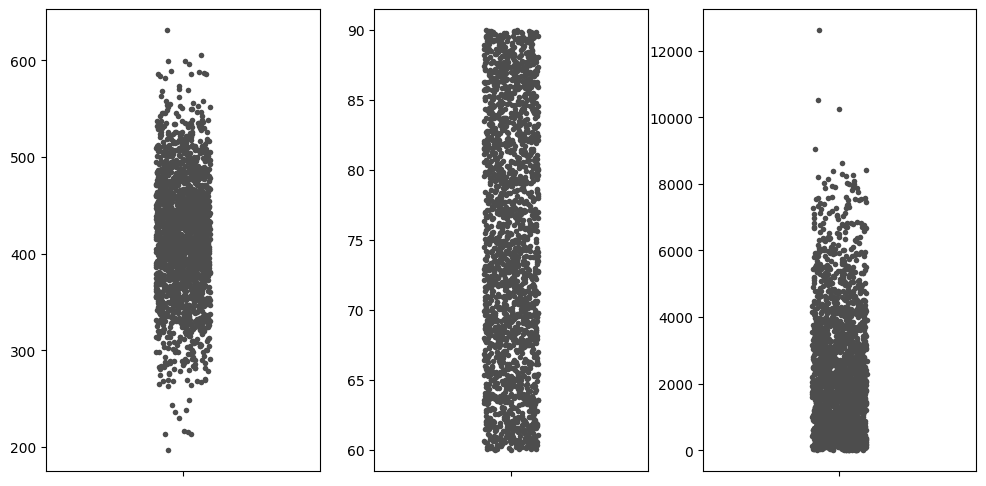

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))


for ax, column in zip(axs, agents_data[["average_handle_time", "service_level", "idle_time"]]):
    sns.stripplot(ax=ax,
                data=agents_data,
                y=column,
                size=4,
                color=".3",
                jitter=True)
    
    ax.set_ylabel("")


plt.show()

In [13]:
""" Add data to their corresponding table """

# Connection
connection = sqlite3.connect("./local_database.db")


# Add data
agents_data.to_sql("agents", connection, if_exists="replace", index=False)
supervisors_data.to_sql("supervisors", connection, if_exists="replace", index=False)


# Commit changes
connection.commit()
connection.close()